In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import warnings
import matplotlib.colors as colors
import matplotlib.animation as animation
import matplotlib.lines as lines
import datetime
import math
import csv
import random
from seaborn import heatmap
from sociophysicsDataHandler import SociophysicsDataHandler
%matplotlib notebook

In [2]:
dh = SociophysicsDataHandler()
dh.fetch_background_image_from_path('ehv/background_images/EHV.Perron2.1_multisensor.png')

df = pd.read_csv('../simulator/simulation_results_valve_1.csv')

#print(df.to_string())

df['tracked_object'] = df['ID']
df.head(50)

trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/background_images/EHV.Perron2.1_multisensor.png
background fetched. Accessible as <this-object>.bg


,ID,Offboarding,Onboarding,Time,Zone,x_pos,y_pos,tracked_object
0,1000,True,False,1652101693,13,0.0,13,1000
1,1001,False,True,1652101693,10,0.0,10,1001
2,1002,False,True,1652101693,4,0.0,4,1002
3,1003,False,True,1652101693,11,0.0,11,1003
4,1004,False,True,1652101693,10,0.0,10,1004
5,1000,True,False,1652101694,12,0.0,12,1000
6,1001,False,True,1652101694,938,67.0,0,1001
7,1002,False,True,1652101694,4,0.0,4,1002
8,1003,False,True,1652101694,11,0.0,11,1003
9,1004,False,True,1652101694,11,0.0,11,1004


<IPython.core.display.Javascript object>


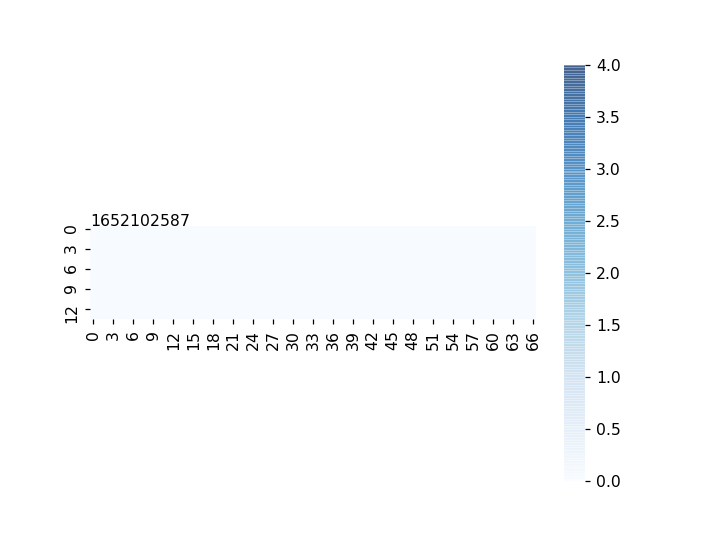

In [3]:
xmin = -5134
ymin = -17731
xmax =  75135
ymax =  11645

cmap = colors.LinearSegmentedColormap.from_list("",["black","blue","red"])#("",["black","black"])
#rect1 = patches.Rectangle((boarding_limits_1[0],boarding_limits_1[2]),boarding_limits_1[1]-boarding_limits_1[0],boarding_limits_1[3]-boarding_limits_1[2],fill=False,color="red",linewidth=2,angle=-0.8)
#rect2 = patches.Rectangle((boarding_limits_2[0],boarding_limits_2[2]),boarding_limits_2[1]-boarding_limits_2[0],boarding_limits_2[3]-boarding_limits_2[2],fill=False,color="red",linewidth=2,angle=-0.8)





class AnimatedHeatmap:
    
    def create_heatmap(self, temp_df):
        height = 14
        width = 67
        hm = [[0]*width for i in range(height)]
        for index, row in temp_df.iterrows():
            x = int(row['x_pos'])
            y = height-int(row['y_pos'])-1
            hm[y][x] = hm[y][x]+1
        return hm
    
    def __init__(self):
        
        self.fig, self.ax = plt.subplots()
        self.ani = animation.FuncAnimation(self.fig, self.update, init_func = self.setup_plot, interval = 100, blit=False)
        
    def setup_plot(self):
        
        self.date_time = df['Time'][0]
        # 2022 september 28th: 18:40, 19:06, 17:38, 17:50
        temp_df = df[df['Time'] == self.date_time].copy()
#         temp_df = temp_df[temp_df['Offboarding']].copy()

        hm = self.create_heatmap(temp_df)
        #on_or_off = temp_df['onboarding_or_offboarding']
        self.ax = heatmap(hm,ax=self.ax,vmax=4,cmap=plt.cm.Blues, alpha=0.5,square=True)
        
        
        #plt.imshow(dh.bg)
        self.ax.axis([xmin,xmax,ymin,ymax])
        self.txt = plt.text(0,0, self.date_time, c='black',zorder=2)
        
        line1 = lines.Line2D([], [], color="none", marker='o', markerfacecolor="red",markeredgecolor="none")
        line2 = lines.Line2D([], [], color="none", marker='o', markerfacecolor="blue",markeredgecolor="none")
        
        #plt.legend((line1,line2),('offboarding','onboarding'),numpoints=1,loc=1)
        
        #plt.gca().add_patch(rect1)
        #plt.gca().add_patch(rect2)
        


    def update(self, i):
        
        self.date_time =  self.date_time + 1
        temp_df = df[df['Time'] ==  self.date_time].copy()
#         temp_df = temp_df[temp_df['Offboarding']].copy()

        hm = self.create_heatmap(temp_df)
        #on_or_off = temp_df['onboarding_or_offboarding']
        self.ax = heatmap(hm,ax=self.ax,cbar=False,vmax=4,cmap=plt.cm.Blues)
        #my_heatmap.imshow(dh.bg,zorder=1)
        #self.scat.set_array(on_or_off)
        self.txt.set_text( self.date_time)

        
a = AnimatedHeatmap()


#plt.imshow(dh.bg,zorder = 0, extent=[xmin, xmax, ymin, ymax])









